In [54]:
import pandas as pd
import seaborn as sns

In [55]:
df = pd.read_csv("results/test_best/train_results.csv")

In [56]:
df

,DM,N_tr,M,Mo,Ko,N_bc,Error,Me,Ke,Method,Config,Time,Fitness,It.
0,0,500,7,SRMP,3,100,0,SRMP,3,SA,0,94.561605,0.770000,23000
1,1,500,7,SRMP,3,100,0,SRMP,3,SA,0,106.216273,0.730000,23000
2,2,500,7,SRMP,3,100,0,SRMP,3,SA,0,112.226968,0.740000,23000
3,0,500,7,SRMP,3,300,0,SRMP,3,SA,0,275.454966,0.633333,23000
4,2,500,7,SRMP,3,300,0,SRMP,3,SA,0,249.483682,0.616667,23000
5,1,500,7,SRMP,3,300,0,SRMP,3,SA,0,358.349655,0.590000,23000
6,0,500,7,SRMP,3,500,0,SRMP,3,SA,0,418.763647,0.632000,23000
7,2,500,7,SRMP,3,500,0,SRMP,3,SA,0,402.013974,0.606000,23000
8,1,500,7,SRMP,3,500,0,SRMP,3,SA,0,548.285007,0.598000,23000
9,3,500,7,SRMP,3,300,0,SRMP,3,SA,0,295.191509,0.670000,23000


In [31]:
dfm = df[df["Mo"] == "SRMP"].groupby("Config").max(numeric_only=True)
dfm[dfm["Fitness"] <= 0.75]

KeyError: 'Mo'

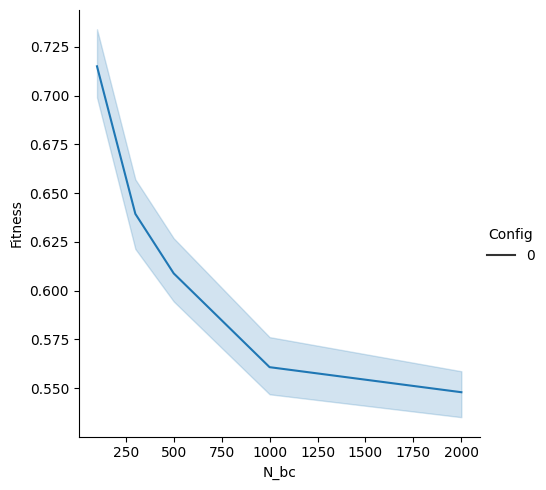

In [58]:
dff = df[df["Mo"] == "SRMP"].groupby("Config").max(numeric_only=True)
sns.relplot(
    data=df,#dff[dff["Fitness"] >= 0.75],
    x="N_bc",
    y="Fitness",
    style="Config",
    # hue="Config",
    # col="M",
    # row_order=["1", "2", "3", "4"],
    # col_order=["7", "11", "15"],
    kind="line",
    # errorbar=("ci", 95),
    # err_style="bars",
    # err_kws={"capsize": 5},
)